<a href="https://colab.research.google.com/github/Guiandreis/pneumonia_detection/blob/main/EDA_pneumonia_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT KAGGLE DATASET AND EXTRACT

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"guilhermerandreis","key":"620b6777fb15a312ba23b9f0e9d6e286"}'}

In [3]:
! mkdir ~/.kaggle/

In [4]:
! cp kaggle.json ~/.kaggle/ 


In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                       title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                        Data Science Job Salaries                            7KB  2022-06-15 08:59:12           7699        261  1.0              
surajjha101/bigbasket-entire-product-list-28k-datapoints  BigBasket Entire Product List (~28K datapoints)      6MB  2022-06-22 12:51:18           2706        111  1.0              
victorsoeiro/netflix-tv-shows-and-movies                  Netflix TV Shows and Movies                          2MB  2022-05-15 00:01:23          17572        504  1.0              
sameepvani/nasa-nearest-earth-objects                     NASA - Nearest Earth Objects         

In [7]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:36<00:00, 41.8MB/s]
100% 2.29G/2.29G [00:36<00:00, 67.0MB/s]


In [8]:
import zipfile

In [9]:
path_to_zip_file = '/content/chest-xray-pneumonia.zip'
directory_to_extract_to = '/content/'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

# IMPORT PACKAGES

In [18]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import cv2
import random
import os

# EXPLORATORY DATA ANALYSIS

In [11]:
train_path = glob.glob('/content/chest_xray/train/*/*')
test_path = glob.glob('/content/chest_xray/test/*/*')
val_path = glob.glob('/content/chest_xray/val/*/*')
total_images_path = train_path + test_path + val_path

len(train_path),len(test_path),len(val_path),len(total_images_path)

(5216, 624, 16, 5856)

image shape (592, 968, 3) category PNEUMONIA


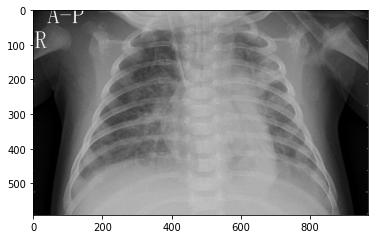

image shape (944, 1416, 3) category PNEUMONIA


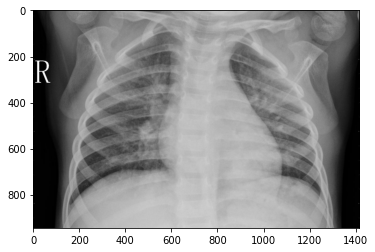

image shape (1128, 1664, 3) category PNEUMONIA


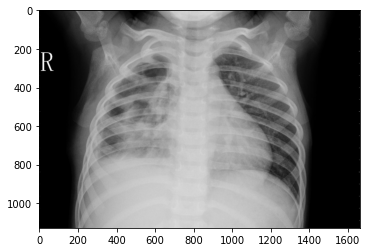

image shape (712, 1072, 3) category PNEUMONIA


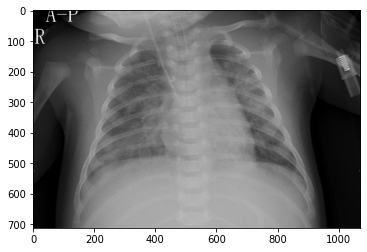

image shape (952, 1192, 3) category PNEUMONIA


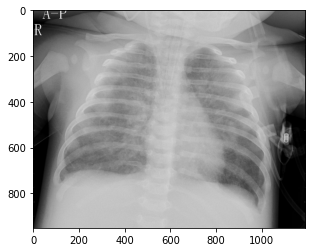

image shape (864, 1256, 3) category PNEUMONIA


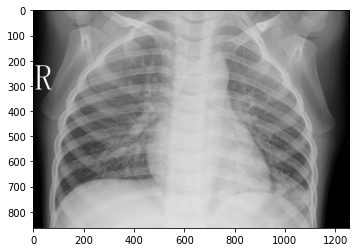

image shape (664, 1152, 3) category PNEUMONIA


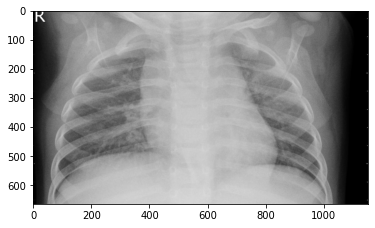

image shape (656, 1016, 3) category PNEUMONIA


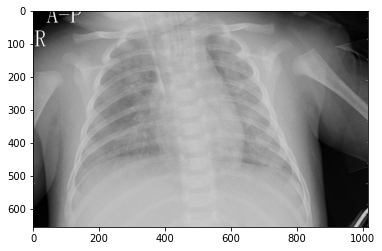

image shape (1104, 1328, 3) category NORMAL


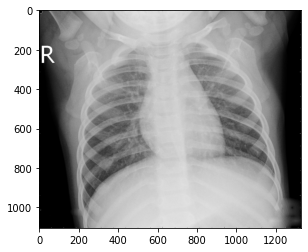

image shape (1302, 1564, 3) category NORMAL


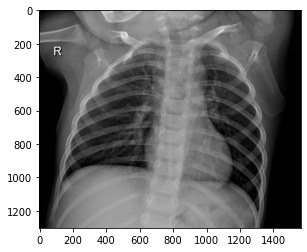

image shape (928, 1288, 3) category NORMAL


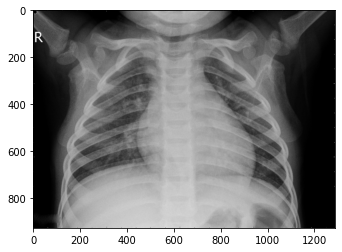

image shape (1040, 1272, 3) category NORMAL


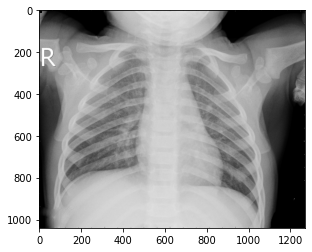

image shape (1416, 1776, 3) category NORMAL


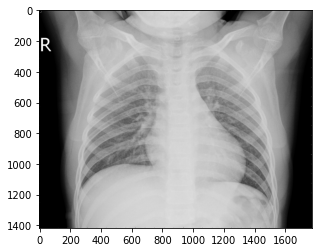

image shape (1416, 1736, 3) category NORMAL


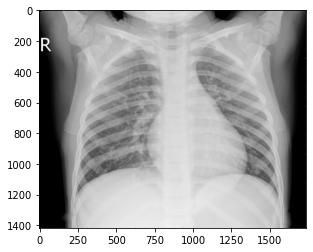

image shape (1225, 1632, 3) category NORMAL


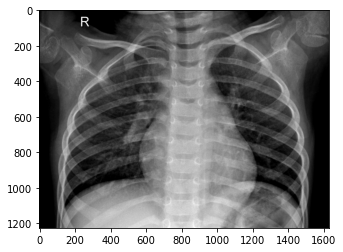

image shape (1104, 1240, 3) category NORMAL


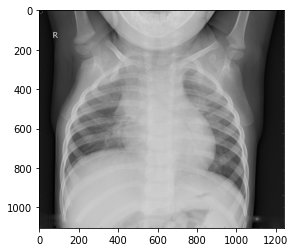

In [12]:
for path in val_path:
  image = cv2.imread(path)
  print('image shape',image.shape,'category',path.split('/')[-2])
  plt.imshow(image)
  plt.show()

1583 4273


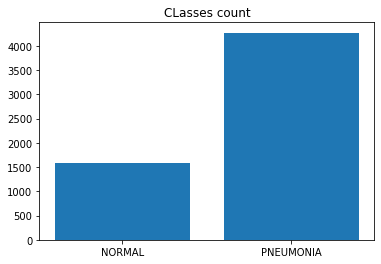

In [34]:
total_pneumonia_images = glob.glob('/content/chest_xray/chest_xray/*/PNEUMONIA/*')
total_normal_images = glob.glob('/content/chest_xray/chest_xray/*/NORMAL/*')

classes = ['NORMAL','PNEUMONIA']
values = [len(total_normal_images),len(total_pneumonia_images)]
print(len(total_normal_images),len(total_pneumonia_images))

plt.bar(classes,values)
plt.title('CLasses count')
plt.show()